**House Sales in King County, USA**

The following output of house sales in King County USA aims to draw relationships between different variables through the use of linear and ridge regression models.

Initialsing, Cleaning and Formating Data.

In [ ]:
# Install Libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [ ]:
# Reading Data set and Converting to DataFrame
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(url)


In [ ]:
# Display First Five Rows of DF
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Identifying Data Categories
df.dtypes

,0
Unnamed: 0,int64
id,int64
date,object
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64


In [ ]:
# Breakdown of Descriptive Statistics of Data Set
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
# Find and Replace Missing Values With Mean Total
df.drop(['id','Unnamed: 0'], axis=1, inplace=True)
df.describe()

mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


/tmp/ipython-input-6-4221262723.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].replace(np.nan,mean, inplace=True)
/tmp/ipython-input-6-4221262723.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

Using the method value_counts to count the number of houses with unique floor values, used the method .to_frame() to convert it to a data frame.

In [ ]:
# Exploratory Data Analysis used to describe basic distributions and counts in dataset.
floor_counts = df['floors'].value_counts().to_frame(name='count')
floor_counts

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


Using the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers.

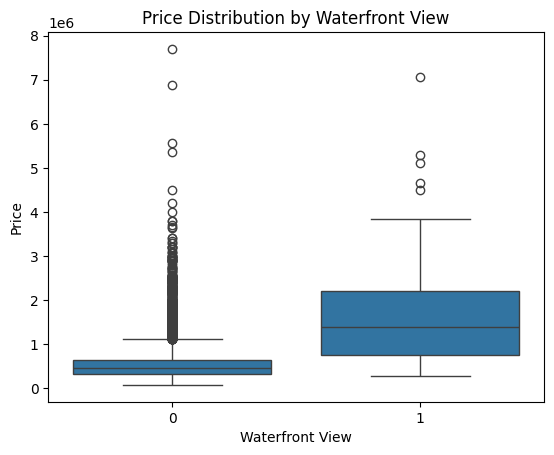

In [ ]:
# Price Outlier Analysis by Waterfront View
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Price Distribution by Waterfront View')
plt.xlabel('Waterfront View')
plt.ylabel('Price')
plt.show()

Using the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.

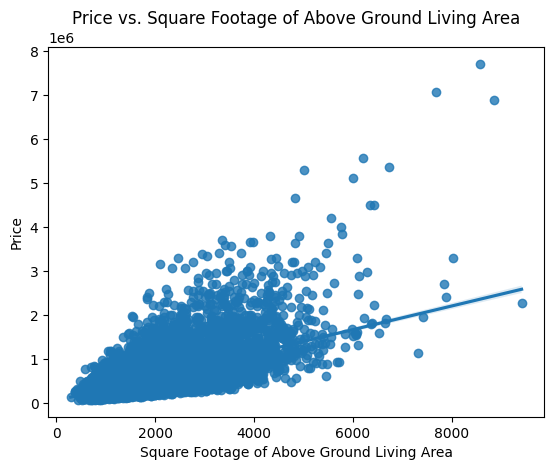

In [ ]:
# Correlation Between Sqft_above and Price
sns.regplot(x='sqft_above', y='price', data=df)
plt.title('Price vs. Square Footage of Above Ground Living Area')
plt.xlabel('Square Footage of Above Ground Living Area')
plt.ylabel('Price')
plt.show()

Fitting a linear regression model to predict the 'price' using the feature 'sqft_living' then calculating the R^2.

In [ ]:
# Simple Linear Regression: sqft_living vs Price
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Defining the feature and target
X = df[['sqft_living']]  # Features must be 2D
y = df['price']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create and fit the linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Predict on test set
y_pred = lm.predict(X_test)

# Calculate R^2
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)



R² Score: 0.5033019006466926


Fitting a linear regression model to predict the 'price' using the list of features:

In [ ]:
#Multiple Linear Regression with Selected Features
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
# Defining X and Y Variables
X = df[features]
y = df["price"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit the linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Predict and calculate R²
y_pred = lm.predict(X_test)
r2 = lm.score(X_test, y_test)

print("R² value:", r2)


R² value: 0.6459217069635679


Creating a list of tuples, the first element in the tuple contains the name of the estimator:

'scale'

'polynomial'

'model'

The second element in the tuple contains the model constructor

StandardScaler()

PolynomialFeatures(include_bias=False)

LinearRegression()



In [ ]:
# Pipeline Construction for Polynomial Regression
input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

input = [
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
]

# Create pipeline
pipe = Pipeline(input)

# Fit the model
pipe.fit(X, y)

# Calculate R^2
r2 = pipe.score(X, y)
print("R^2 value:", r2)

R^2 value: 0.7513408515988734


Creating and fitting a Ridge regression object using the training data, setting the regularization parameter to 0.1, and then calculating the R^2 using the test data.

In [ ]:
# Ridge Regression on Training Data
from sklearn.linear_model import Ridge

# Create Ridge regression model with alpha = 0.1
RidgeModel = Ridge(alpha=0.1)

# Fit the model using the training data
RidgeModel.fit(X_train, y_train)

# Calculate and print the R^2 score using the test data
r2_ridge = RidgeModel.score(X_test, y_test)
print("R^2 for Ridge Regression:", r2_ridge)


R^2 for Ridge Regression: 0.6459152254891418


Performing a second order polynomial transform on both the training data and testing data. Creating and fitting a Ridge regression object using the training data, setting the regularisation parameter to 0.1, and calculating the R^2 utilising the test data provided

In [ ]:
# Polynomial Ridge Regression (Degree 2)
# Apply 2nd order polynomial transformation
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit Ridge regression model
ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(X_train_poly, y_train)

# Predict and calculate R^2
y_pred = ridge_poly.predict(X_test_poly)
r2_poly_ridge = r2_score(y_test, y_pred)

# Print R^2
print("R^2 score (Polynomial Ridge Regression, degree 2):", r2_poly_ridge)

R^2 score (Polynomial Ridge Regression, degree 2): 0.7543633732675008
